<a href="https://colab.research.google.com/github/shahdelsayed-ss/course-lec1/blob/main/Project_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Section 1: Load and Clean data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
url = "https://raw.githubusercontent.com/faris-alsherif/Customer-Churn-Prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


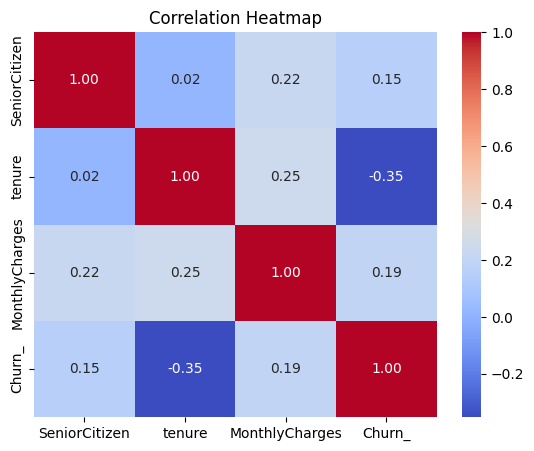

In [4]:
# Correlation heatmap
num_for_corr = df.select_dtypes(include=[np.number]).copy()
if "Churn" in df.columns:
    num_for_corr["Churn_"] = (df["Churn"].str.lower().isin(["yes","true","1"])).astype(int)

plt.figure(figsize=(6.5,5))
sns.heatmap(num_for_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
df.shape

(7043, 21)

In [6]:
#to read all columns with the first five rows
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
#Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [10]:
#Show duplicate rows
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
#To delete the "customerID" columns
df.drop("customerID",axis=1,inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [12]:
df.shape

(7043, 20)

In [13]:
#To make the letters of each column a lower letter
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No
onlinebackup,Yes,No,Yes,No,No


In [14]:
#printing the unique values in all  the columns
for column in df.columns:
    print(column,df[column].unique())
    print("*"*50)

gender ['Female' 'Male']
**************************************************
seniorcitizen [0 1]
**************************************************
partner ['Yes' 'No']
**************************************************
dependents ['No' 'Yes']
**************************************************
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
phoneservice ['No' 'Yes']
**************************************************
multiplelines ['No phone service' 'No' 'Yes']
**************************************************
internetservice ['DSL' 'Fiber optic' 'No']
**************************************************
onlinesecurity ['No' 'Yes' 'No internet service']
**************************************************
onlinebackup ['Yes' 'No' 'No internet service']
*******

In [15]:
#to use describe function
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Is the data balanced?

*  checking the class distribution of target column.



In [16]:
#How many customers churned
df.churn.value_counts() #imbalance

,count
churn,
No,5174
Yes,1869


churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


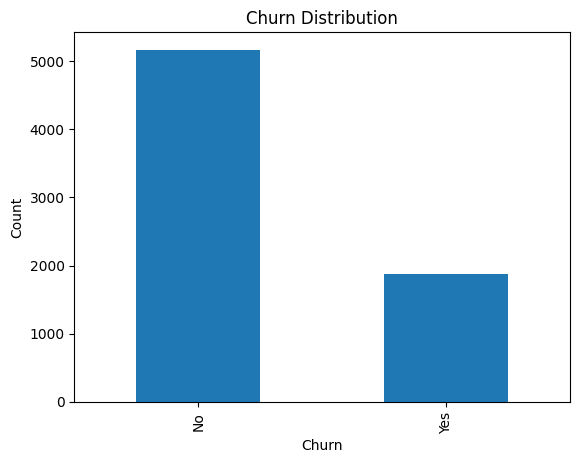

In [17]:
# Calculate the percentage for each value
print(df["churn"].value_counts(normalize=True))


df["churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Handle missing values.

In [18]:
#To find out how many rows equal spaces in the monthlycharges column
df[df["monthlycharges"]==" "].T

""
gender
seniorcitizen
partner
dependents
tenure
phoneservice
multiplelines
internetservice
onlinesecurity
onlinebackup


In [19]:
df.monthlycharges.describe()

,monthlycharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [20]:
#### TotalCharges column ####

In [21]:
df.totalcharges.describe()

,totalcharges
count,7043
unique,6531
top,
freq,11


In [22]:
#To check for spaces in a TotalCharges column
df[df.totalcharges.str.contains(" ")]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
#To find out how many rows equal spaces in the Totalcharges column
len(df[df.totalcharges.str.contains(" ")])

11

In [24]:
df[df["totalcharges"]==" "].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
multiplelines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
internetservice,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
onlinesecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
onlinebackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [25]:
df["totalcharges"].dtype

dtype('O')

In [26]:
df["totalcharges"].describe()

,totalcharges
count,7043
unique,6531
top,
freq,11


In [27]:
#To convert the data type of the Totalcharges column from object to Float
df["totalcharges"]= pd.to_numeric(df.totalcharges,errors="coerce") #errors="coerce" -->makes any non-convertible value NaN

In [28]:
#To check if spaces  ​​convert to NaN
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
multiplelines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
internetservice,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
onlinesecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
onlinebackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


<Axes: >

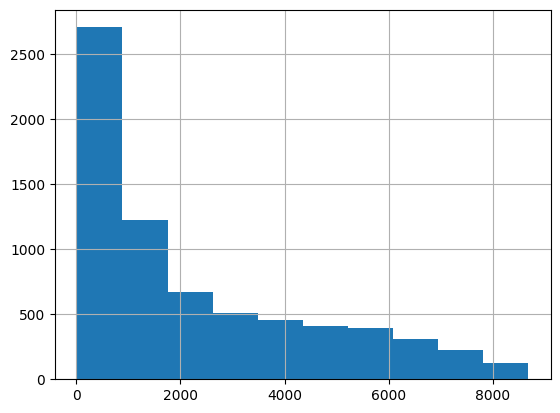

In [29]:
df["totalcharges"].hist()

In [30]:
#Totalcharges Column relationship with other columns
df[["totalcharges","monthlycharges","tenure"]].corr()

,totalcharges,monthlycharges,tenure
totalcharges,1.000000,0.651065,0.82588
monthlycharges,0.651065,1.000000,0.24790
tenure,0.825880,0.247900,1.00000


In [31]:
#To delete rows that contain null values ​​from a Totalcharges column
df.dropna(subset=["totalcharges"],inplace=True)


In [32]:
df["totalcharges"].isnull().sum()

np.int64(0)

In [33]:
df["totalcharges"].describe()

,totalcharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [34]:
df.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [35]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## **Section 2: Exploratory Data Analysis**

In [36]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
multiplelines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes
onlinebackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No internet service,No,Yes,No,No,No


In [37]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")


  col_mean = df[column_name].mean()
  col_median = df[column_name].median()


  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="dashed", label="Median")

  plt.legend()

  plt.grid(True)

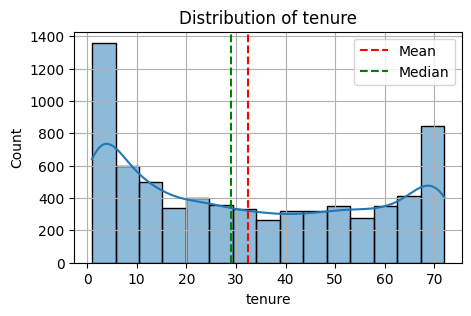

In [38]:
plot_histogram(df, "tenure")

In [39]:
tenure_churn = df.groupby("churn")["tenure"].mean()
tenure_churn

,tenure
churn,
No,37.650010
Yes,17.979133


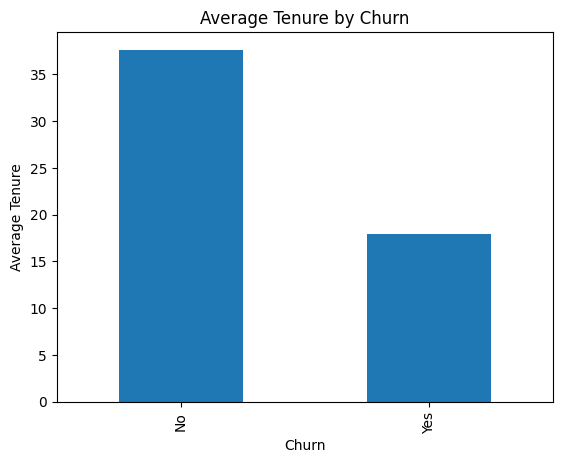

In [40]:
tenure_churn.plot(kind="bar")
plt.title("Average Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Tenure")
plt.show()

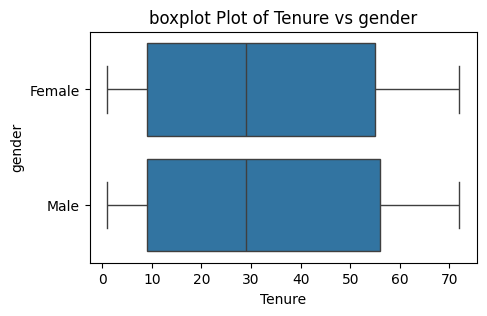

In [41]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df["tenure"], y=df["gender"])
plt.title("boxplot Plot of Tenure vs gender")
plt.xlabel("Tenure")
plt.ylabel("gender")
plt.show()

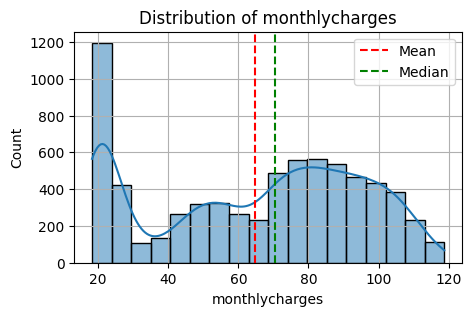

In [42]:
plot_histogram(df, "monthlycharges")

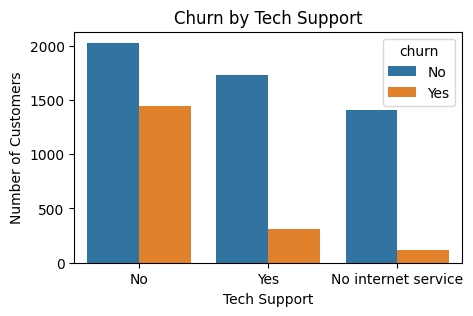

In [43]:
plt.figure(figsize=(5,3))
sns.countplot(x="techsupport", hue="churn", data=df)
plt.title("Churn by Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Number of Customers")
plt.show()

<Figure size 600x400 with 0 Axes>

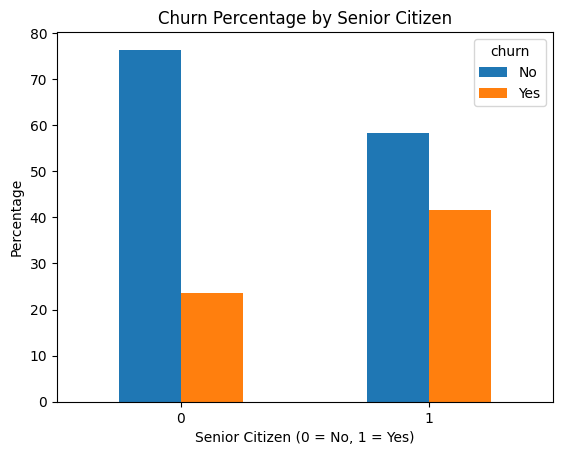

In [44]:
senior_churn_pct = df.groupby('seniorcitizen')['churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(6,4))
senior_churn_pct.plot(kind='bar', stacked=False)
plt.title("Churn Percentage by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

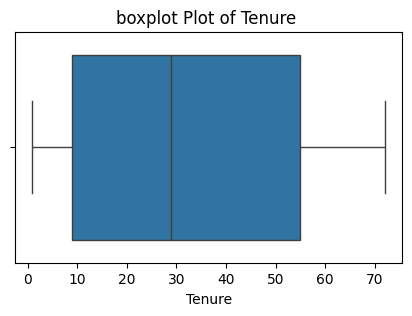

In [45]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df["tenure"])
plt.title("boxplot Plot of Tenure ")
plt.xlabel("Tenure")

plt.show()

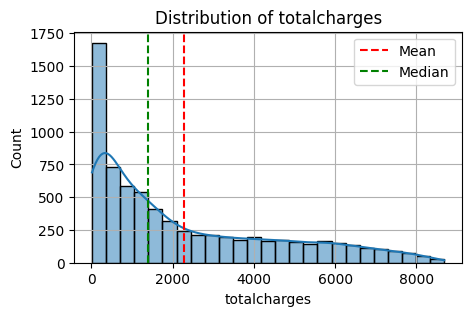

In [46]:
plot_histogram(df, "totalcharges")

In [47]:
# Remove outliers using IQR method
Q1 = df['totalcharges'].quantile(0.25)
Q3 = df['totalcharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['totalcharges'] >= lower_bound) & (df['totalcharges'] <= upper_bound)].copy()

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

Original number of rows: 7032
Number of rows after outlier removal: 7032


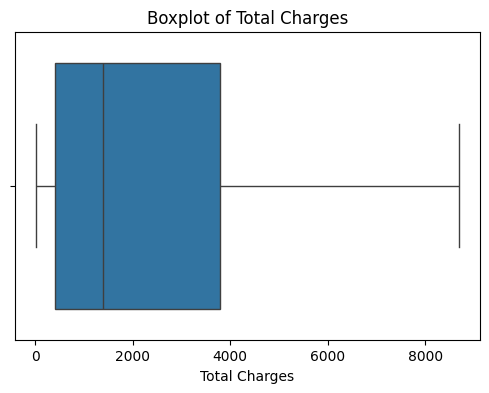

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["totalcharges"])
plt.title("Boxplot of Total Charges")
plt.xlabel("Total Charges")
plt.show()

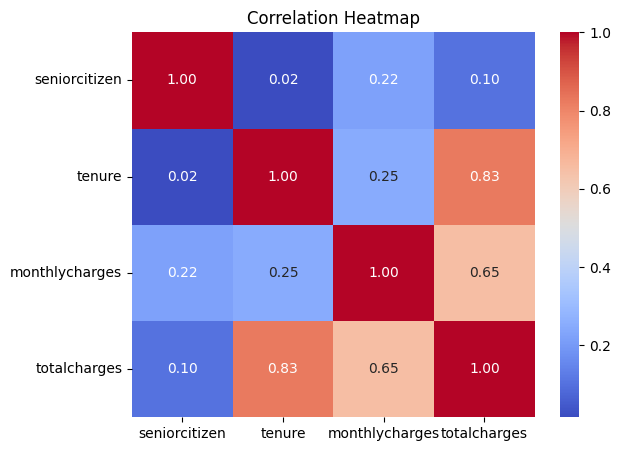

In [49]:
# Correlation heatmap
num_for_corr = df.select_dtypes(include=[np.number]).copy()
if "Churn" in df.columns:
    num_for_corr["Churn_"] = (df["Churn"].str.lower().isin(["yes","true","1"])).astype(int)

plt.figure(figsize=(6.5,5))
sns.heatmap(num_for_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

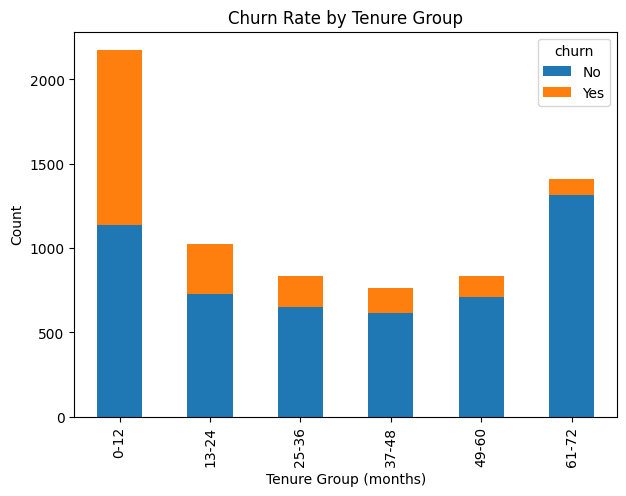

In [50]:
# Churn rate by tenure groups
df["TenureGroup"] = pd.cut(df["tenure"], bins=[0,12,24,36,48,60,72], labels=["0-12","13-24","25-36","37-48","49-60","61-72"])
tenure_churn = pd.crosstab(df["TenureGroup"], df["churn"])
tenure_churn.plot(kind="bar", stacked=True, figsize=(7,5))
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group (months)")
plt.ylabel("Count")
plt.show()

In [86]:

import math

def churn_countplots_all(df, churn_col="churn"):
    # نتأكد من وجود عمود churn
    churn_real = None
    for c in df.columns:
        if c.strip().lower() == churn_col.lower():
            churn_real = c
            break
    if churn_real is None:
        raise ValueError(f"'{churn_col}' مش موجود في الأعمدة! المتاح: {df.columns.tolist()}")

    cols = [col for col in df.columns if col != churn_real]

    n = len(cols)
    cols_grid = 3   # عدد الأعمدة في كل صف
    rows = math.ceil(n / cols_grid)

    fig, axes = plt.subplots(rows, cols_grid, figsize=(12, 3*rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        if df[col].dtype == "object" or df[col].nunique() < 10:
            sns.countplot(x=col, hue=churn_real, data=df, ax=axes[i])
        else:
            sns.boxplot(x=churn_real, y=col, data=df, ax=axes[i])

        axes[i].set_title(f"Churn vs {col}", fontsize=10)
        axes[i].tick_params(axis='x', rotation=20)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


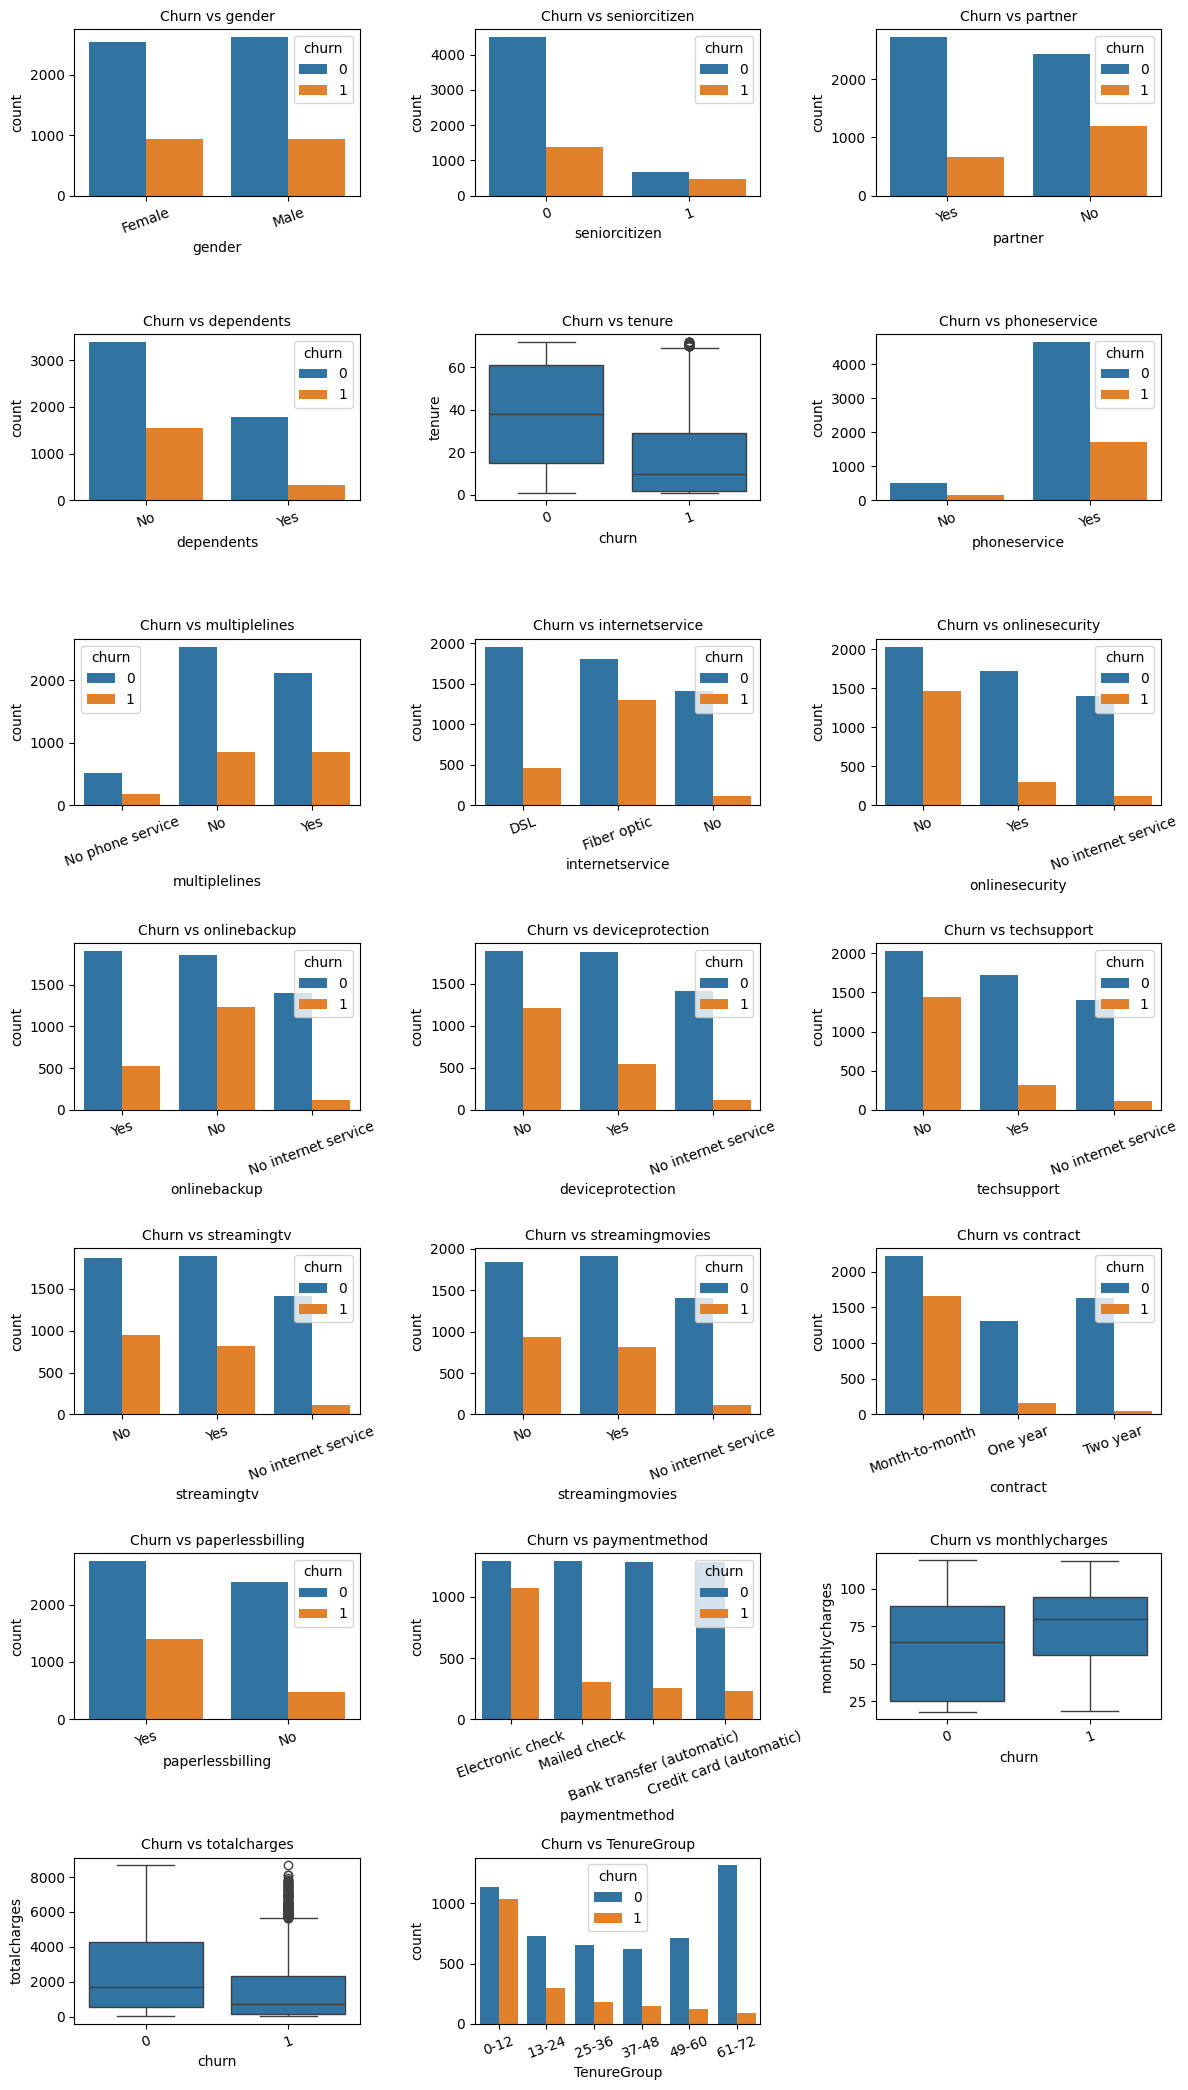

In [85]:
churn_countplots_all(df, churn_col="churn")


<h1>Section 3: Preprocessing</h1>

In [55]:
# Convert target 'Churn' values ​​to 0 and 1
df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})

In [56]:
# Separate features and target variable
x = df.drop("churn", axis=1)
y = df["churn"]

x.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0-12


In [57]:
#to print value of column churn
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int64


In [58]:
# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include="object").columns
numerical_cols = x.select_dtypes(include=np.number).columns

print(categorical_cols,"""
*********************************************************************
""",numerical_cols)

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object') 
*********************************************************************
 Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')


In [59]:
# Convert categorical columns to numerical columns
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

x.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,TenureGroup
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0-12
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,25-36
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0-12
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,37-48
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0-12


In [60]:
# Apply StandardScaler to numerical columns
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

x.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,TenureGroup
0,0,-0.440327,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0-12
1,1,-0.440327,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,25-36
2,1,-0.440327,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,0-12
3,1,-0.440327,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,37-48
4,0,-0.440327,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,0-12


In [61]:
# Drop the 'TenureGroup' column as it was created for visualization and is not needed for modeling
if 'TenureGroup' in x.columns:
    x = x.drop('TenureGroup', axis=1)

x.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,-0.440327,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,1,-0.440327,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,1,-0.440327,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,1,-0.440327,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,-0.440327,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457


In [62]:
ros = RandomOverSampler(random_state=42)
x_oversampled, y_oversampled = ros.fit_resample(x, y)

print("Class distribution after Random Oversampling:")
print(np.bincount(y_oversampled))

Class distribution after Random Oversampling:
[5163 5163]


In [63]:
print(y_oversampled.value_counts())

churn
0    5163
1    5163
Name: count, dtype: int64


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (8260, 19)
Testing set shape: (2066, 19)


<h1>Section 4: Machine Learning</h1>

<h2>Logistic Regression Model</h2>

In [65]:
# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV here

# Implement hyperparameter tuning for the Random Forest model
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)
print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)

Best Random Forest params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest accuracy: 0.8762711864406778


In [67]:
# Evaluate Logistic Regression performance
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      1037
           1       0.75      0.79      0.77      1029

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066


Logistic Regression Confusion Matrix:
[[760 277]
 [211 818]]


In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score

import numpy as np

param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)
print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression accuracy:", grid_lr.best_score_)

Best Logistic Regression params: {'C': 1, 'solver': 'liblinear'}
Best Logistic Regression accuracy: 0.7667070217917675


<h2>Random Forest Model</h2>

In [69]:
rfc=RandomForestClassifier(n_estimators=200,random_state=42) #200 Tree
rfc.fit(x_train,y_train)
y_pred=(rfc.predict(x_test))

In [70]:
print("Model accurecy:   ",accuracy_score(y_test,y_pred))

Model accurecy:    0.8964181994191674


In [71]:
# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1037
           1       0.85      0.96      0.90      1029

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066

Confusion Matrix:
[[869 168]
 [ 46 983]]


In [72]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)
print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)

Best Random Forest params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest accuracy: 0.8795399515738499


In [73]:
# Feature importance
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)


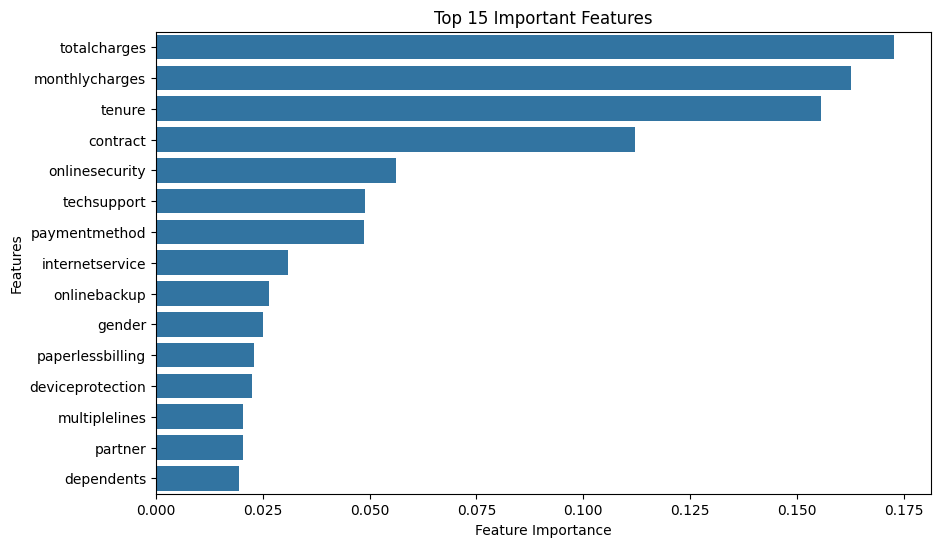

In [74]:
# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [75]:
import joblib

# Save the Logistic Regression model
joblib.dump(grid_lr.best_estimator_, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Model Comparison

Based on the evaluation metrics:

*   **Logistic Regression:**
    *   Accuracy: ~76.4%
    *   F1-score: ~0.76 for both classes
    *   Confusion Matrix: Shows a notable number of false positives and false negatives.
    *   Best Parameters (from GridSearchCV): `{'C': 1, 'solver': 'liblinear'}`
    *   Best Cross-validation Accuracy: ~76.7%

*   **Random Forest:**
    *   Accuracy: ~89.6%
    *   F1-score: ~0.89 for class 0 and ~0.90 for class 1.
    *   Confusion Matrix: Shows fewer false positives and false negatives compared to Logistic Regression.
    *   Best Parameters (from GridSearchCV): `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}`
    *   Best Cross-validation Accuracy: ~87.7%

**Conclusion:**

The **Random Forest model** performed significantly better than the Logistic Regression model in terms of overall accuracy, precision, recall, and F1-score on this dataset. The confusion matrix also indicates that the Random Forest model is more effective at correctly classifying both churned and non-churned customers.

The feature importance plot from the Random Forest model highlights the most influential features in predicting churn, with `totalcharges`, `monthlycharges`, and `tenure` being the top three.